# XZ Cyg: Working with TESS observations of an RR Lyrae variable

The RR Lyrae variable star XZ Cyg has been observed by the TESS mission in Sectors 14, 15, 16, 20, and 23.
This notebook shows how to get TESS observations from the Mikulski Archive for Space Telescopes (MAST) at
the Space Telescope Science Institute (STScI) using Python3 packages and functions.

In [1]:
import os
print(os.getcwd(),' =$PWD')
nb = 'nb_xz_cyg_tess_v2.ipynb'
version = '2020AUG22T1042 v0.06'
print(nb,version,'=nb')

/Users/kmighell/top/github/mkpy3/mkpy3  =$PWD
nb_xz_cyg_tess_v2.ipynb 2020AUG22T1042 v0.06 =nb


In [2]:
import sys

Import lightkurve:

In [3]:
try:
    import lightkurve as lk
    print(lk.__version__, ' : lightkurve version')
except Exception:
    print('\n***** ERROR *****\n')
    print('The Python package lightkurve needs to be installed.\n')
    print('This is the installation command for lightkurve using pip:\n')
    print('pip install lightkurve --upgrade\n')
    print('For further installation details see the lightkurve homepage:\n')
    print('https://docs.lightkurve.org/about/install.html\n')
    sys.exit(1)
# pass:try

2.0.dev  : lightkurve version


Import the matplotlib plotting package:

In [4]:
import matplotlib.pyplot as plt

Import the required mkpy3 modules:  

(GitHub repository: https://github.com/KenMighell/mkpy3)

In [5]:
import mkpy3_tpf_plot_add_compasss_rose_v1 as km1
import mkpy3_tess_tpf_overlay_v3 as km2

Show all of the TESS observations of the RR Lyrae variable star XZ Cyg:

In [6]:
target = 'XZ Cyg'
search_results = lk.search_tesscut(target)
n_products = len(search_results)
try:
    assert n_products >= 1
except Exception:
    print("\n*** ERROR *** NO DATA PRODUCTS FOUND FOR TARGET '%s'\n" % target)
    sys.exit(1)
# pass:try
print("%d : data products found for target '%s'" % (n_products, target))

5 : data products found for target 'XZ Cyg'


Show the search results:

In [7]:
search_results

#,observation,target_name,productFilename,distance
0,TESS Sector 14,XZ Cyg,TESSCut,0.0
1,TESS Sector 15,XZ Cyg,TESSCut,0.0
2,TESS Sector 16,XZ Cyg,TESSCut,0.0
3,TESS Sector 20,XZ Cyg,TESSCut,0.0
4,TESS Sector 23,XZ Cyg,TESSCut,0.0


Select the TESS Sector 14 observations (i.e., the first data product) for further analysis:

In [8]:
search_result = search_results[0]

Show the search result:

In [9]:
search_result

#,observation,target_name,productFilename,distance
0,TESS Sector 14,XZ Cyg,TESSCut,0.0


Get a 10x10 TESScut cutout of the TargetPixelFile (TPF) of that observation:

In [10]:
tpf = search_result.download(cutout_size=10, quality_bitmask=0)

Show the standard lightkurve TPF plot:

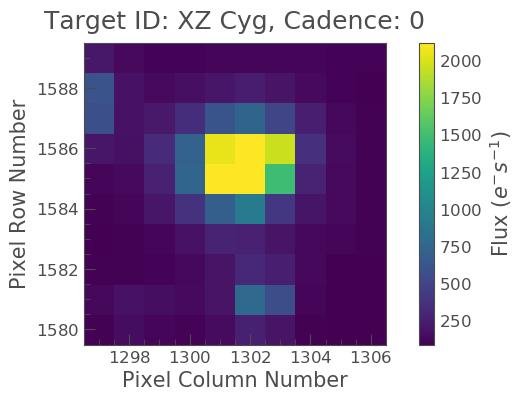

In [11]:
tpf.plot();

Where is North?  Where is East?

Show North and East using a compass rose (long arm points North and the short arm points East):

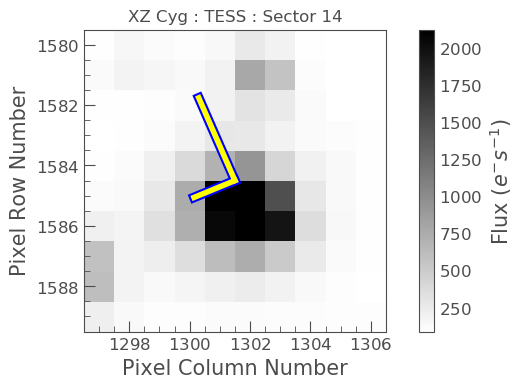

In [12]:
# Fancy TPF plot using mkpy3
oplot1 = 'mkpy3_plot1.png'
ax = tpf.plot(cmap='gray_r')
ax.set_title(target+' : TESS : Sector 14')
km1.mkpy3_tpf_plot_add_compass_rose_v1(tpf=tpf, ax=ax, north_arrow_length_arcsec=60)
ax.invert_yaxis()
plt.savefig(oplot1, dpi=150, bbox_inches = "tight")

Note that the Y axis is inverted to show North (the long arm of the compass rose) pointing (approximately) up.

Rotate the entire plot so that North arm of the compass rose is pointing up:

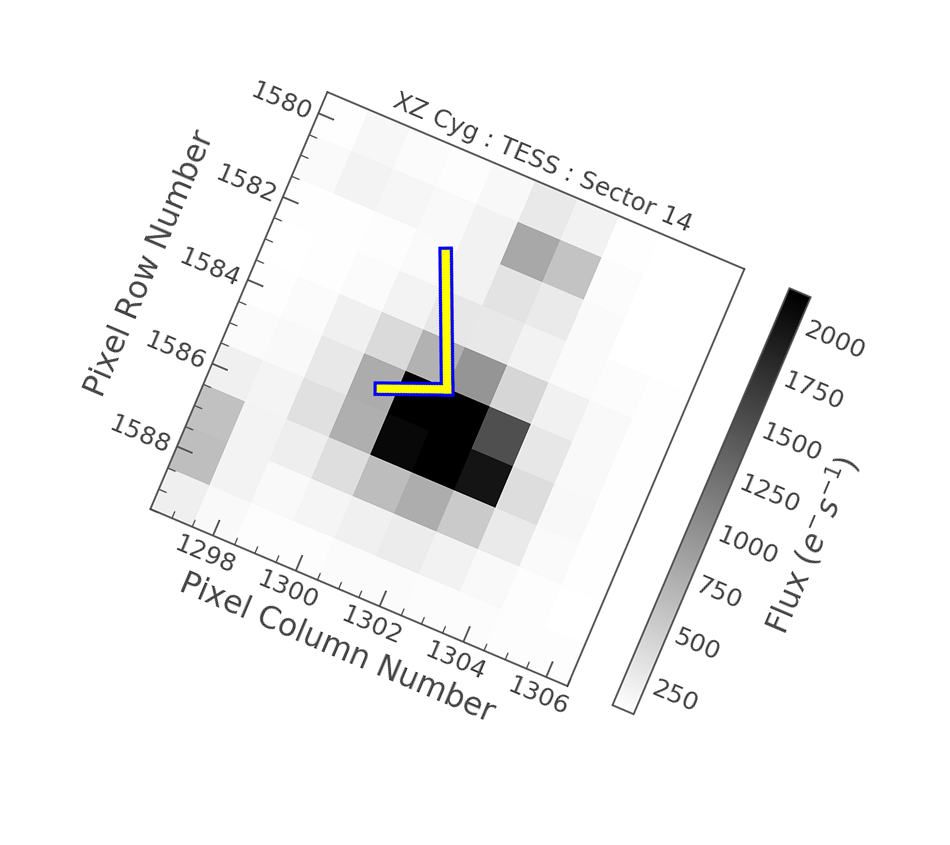

In [13]:
# rotate plot by -23 degrees
from PIL import Image  # pip install Pillow
iplot1 = 'mkpy3_plot1.png'
oplot2 = 'mkpy3_plot2.png'
img = Image.open(iplot1)
img = img.rotate(-23,expand=True,resample=Image.BICUBIC ) # degrees
img.save(oplot2)
#
import IPython.display as ipd
ipd.Image(filename=oplot2, width=650)

Now show the TESScut TPF overlay on the 2MASS-J near-infrared sky survey:


0.000000 =radius_arcsec  (0.000000 =shrink)

293.12209 =ra_deg
56.38819 =dec_deg
0 =cadenceno
0 =frame

mkpy3_plot.png <--- plot_file written



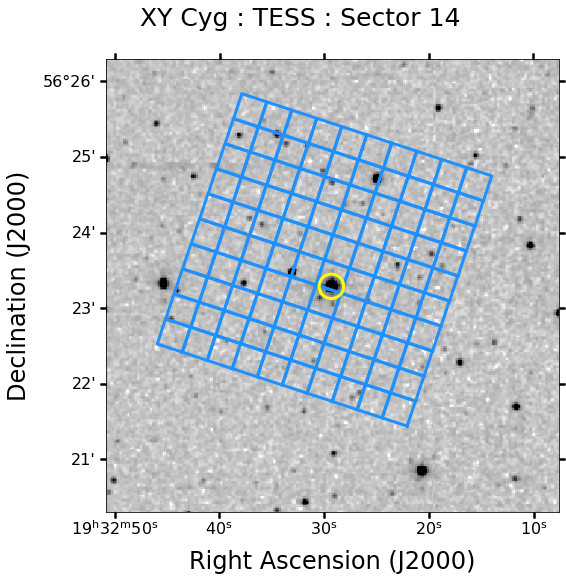

In [14]:
title = 'XY Cyg : TESS : Sector 14'
km2.mkpy3_tess_tpf_overlay_v3(tpf=tpf, title=title, shrink=0.0)

Key:  
* The squares show the TESScut TPF pixel overlay.
* The yellow circle shows the target (XY Cyg) which is a RR Lyrae variable star.

Compare this plot with the previous (rotated) plot.

Now show the TPF overlay with objects from the GAIA DR2 (cyan circles) and VSX (green X) catalogs:


254.558441 =radius_arcsec  (1.000000 =shrink)

False =print_gaia_dr2
^--- set this argument to True to print the GAIA DR2 catalog results.

True =print_vsx
^--- set this argument to False to *not* print the VSX catalog results.


# VSX : AAVSO International Variable Star indeX
# n      sep    RAJ2000      DEJ2000       Period     VSX_max   VSX_min  VSX_Name      VSX_Type
#   [arcsec]    [deg]        [deg]         [days]     [mag]     [mag]
  1    0.050  293.1221200   56.3881900     0.466600     8.900    10.160 'XZ Cyg' 'RRAB/BL'

# VSX : AAVSO International Variable Star indeX
# n   RAJ2000       DEJ2000        RAJ2000        DEJ2000
#     [deg]         [deg]          [hms]          [dms]
  1  293.1221200   56.3881900   19h32m29.3088s   56d23m17.484s

293.12209 =ra_deg
56.38819 =dec_deg
0 =cadenceno
0 =frame

mkpy3_plot.png <--- plot_file written



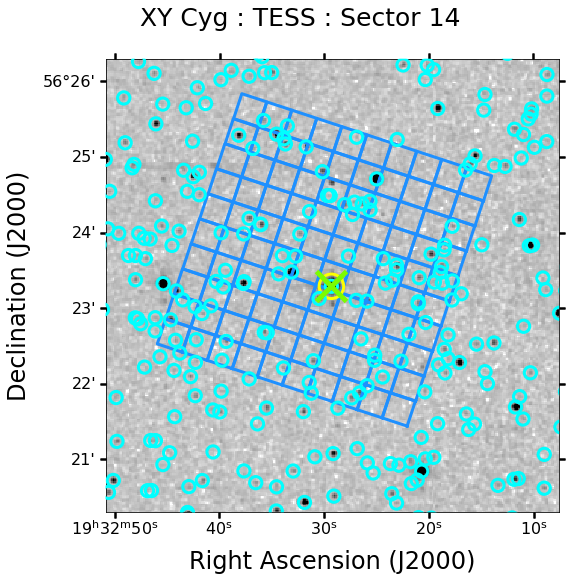

In [15]:
km2.mkpy3_tess_tpf_overlay_v3(tpf=tpf, print_gaia_dr2=False, title=title, percentile=99.5, sexagesimal=True)

Key:  
* The squares show the TESScut TPF pixel overlay.
* The yellow circle shows the target (XY Cyg) which is a RR Lyrae variable star.
* The green X shows the only VSX catalog object (XY Cyg) in the field,
* GAIA DR2 catalog stars in the field are shown as cyan circles.

Show the VSX target with a green X:


254.558441 =radius_arcsec  (1.000000 =shrink)

True =print_vsx
^--- set this argument to False to *not* print the VSX catalog results.


# VSX : AAVSO International Variable Star indeX
# n      sep    RAJ2000      DEJ2000       Period     VSX_max   VSX_min  VSX_Name      VSX_Type
#   [arcsec]    [deg]        [deg]         [days]     [mag]     [mag]
  1    0.050  293.1221200   56.3881900     0.466600     8.900    10.160 'XZ Cyg' 'RRAB/BL'

# VSX : AAVSO International Variable Star indeX
# n   RAJ2000       DEJ2000        RAJ2000        DEJ2000
#     [deg]         [deg]          [hms]          [dms]
  1  293.1221200   56.3881900   19h32m29.3088s   56d23m17.484s

293.12209 =ra_deg
56.38819 =dec_deg
0 =cadenceno
0 =frame

mkpy3_plot.png <--- plot_file written



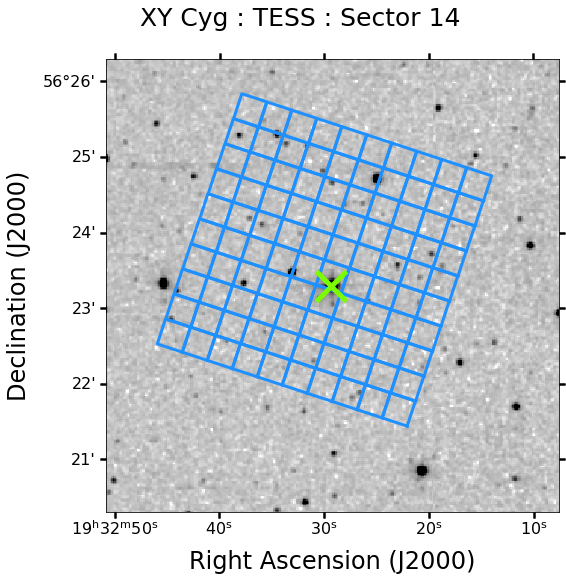

In [16]:
km2.mkpy3_tess_tpf_overlay_v3(tpf=tpf, gaia_dr2_kwargs_str='None', marker_kwargs_str='None',
    title=title, sexagesimal=True)

In [17]:
# EOF